<a href="https://colab.research.google.com/github/kangel429/DeepLearning/blob/master/lesson2_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *                    #fastai 라이브러리 사용

In [0]:
from google.colab import drive                  #구글 드라이버연결
drive.mount('/content/gdrive', force_remount=True)
dir_bears = "/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


구글이미지 검색해서 CtrlShiftj 하면 오른쪽 창이 뜨는데 빈칸에 아래에 있는 명령어를 복사해서 붙이면
이미지 경로가 적혀있는 파일을 다운받게 되어있다.

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [0]:
black_folder = 'black'                #블랙곰 폴더
black_file = 'urls_black.csv'         #블랙곰 이미지 경로     

In [0]:
teddys_folder = 'teddys'              #테디곰 폴더
teddys_file = 'urls_teddys.csv'       #테디곰 이미지 경로

In [0]:
grizzly_folder = 'grizzly'              #회색곰 폴더
grizzly_file = 'urls_grizzly.csv'       #회색곰 이미지 경로 

In [0]:
path = Path(dir_bears)                #구글드라이브 곰 이미지 저장할 위치

In [0]:
path.ls()                             #구글드라이브 위치경로에 있는 폴던안 파일 검색

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/black'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/grizzly'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/teddys'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/urls_grizzly.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/urls_teddys.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/urls_black.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/models'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/cleaned.csv'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/course-v3-master/nbs/dl1/data/bears/export.pkl')]

In [0]:
black_dest = path/black_folder                  #구글드라이브 경로 설정  
black_dest.mkdir(parents=True, exist_ok=True)   #exist_ok=True 그 경로에 있는 폴도이름이 존재 하지 않으면 그 폴더 이름으로 생성해줌
teddys_dest = path/teddys_folder
teddys_dest.mkdir(parents=True, exist_ok=True)
grizzly_dest = path/grizzly_folder
grizzly_dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['teddys','grizzly','black']                      # 테디베어, 회색베어, 블랙베어라는 객체를 만듬 

In [0]:
download_images(path/black_file, black_dest, max_pics=200)      # 구글드라이브 .csv 형식으로 있는 파일내에 있는 사이트에 이미지를 다운로드 함
download_images(path/teddys_file, teddys_dest, max_pics=200) 
download_images(path/grizzly_file, grizzly_dest, max_pics=200) 

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/black_file, black_dest, max_pics=20, max_workers=0)
# download_images(path/teddys_file, teddys_dest, max_pics=20, max_workers=0)
# download_images(path/grizzly_file, grizzly_dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [0]:
for c in classes:                                         # classes안에 들어있는 객체를 print를 통해서 확인하고 
    print(c)
    verify_images(path/c, delete=True, max_size=500)      # path/c 경로에 있는 모든 이미지를 확인해서 delete=True -> 문제가 있는지 확인해서 삭제해줍니다, 
                                                          #max_size=500 이미지 500 이상 벗어나지 못하게 합니다.

teddys


grizzly


black


## View data

In [0]:
np.random.seed(42)                        #랜덤하게 해여 항상 실행할 때마다 결과값이 달라지기
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,    #  데이터를 폴더별로 나누어 져있을 때 사용    path는 파일의 경로     valid_pct=0.2 -->20% valid_pct은 몇 %를 validaion (평가) 데이터 할지
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)   #train은 어디 train 경로

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes                            #data 객체는 총 3개

['black', 'grizzly', 'teddys']

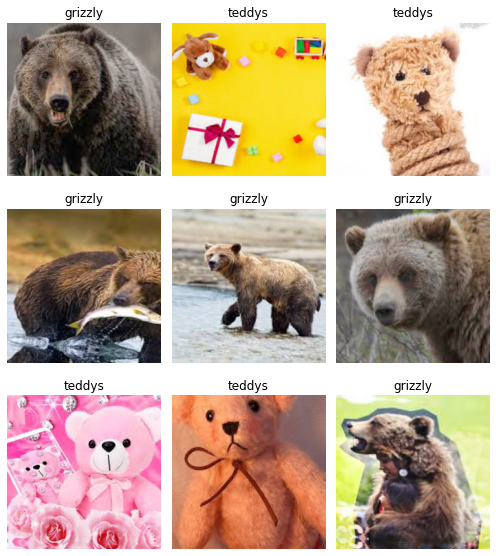

In [0]:
data.show_batch(rows=3, figsize=(7,8))      #data 보여주기

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)      #data 객체, data.c-->레이블 개수, 데이터 훈련 세트 개수 , 검증 세트 개수 

(['black', 'grizzly', 'teddys'], 3, 384, 96)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)      #resnet34 모델 사용, 오류율 체크하기

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)                  #4번 학습  오류율 2%

epoch,train_loss,valid_loss,error_rate,time
0,1.157310,0.128001,0.031250,00:06
1,0.642117,0.075296,0.031250,00:06
2,0.449831,0.086356,0.031250,00:06
3,0.350570,0.091020,0.031250,00:06


In [0]:
learn.save('stage-1')                 #학습한 것을 저장

In [0]:
learn.unfreeze()                      #레이어 잠긴 것을 풀고

In [0]:
learn.lr_find()                       #학습 속도 체크하고

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


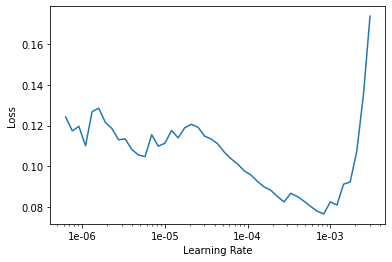

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()               #그래프로 확인합니다

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))   #2번 더 학습

epoch,train_loss,valid_loss,error_rate,time
0,0.174249,0.129062,0.052083,00:06
1,0.113034,0.128341,0.052083,00:06


In [0]:
learn.save('stage-2')       #학습한 데이터 저장

## Interpretation

In [0]:
learn.load('stage-2');        #학습한 데이터 불러오기

In [0]:
interp = ClassificationInterpretation.from_learner(learn)         #학습했던 객체 진행상황을 살펴본다

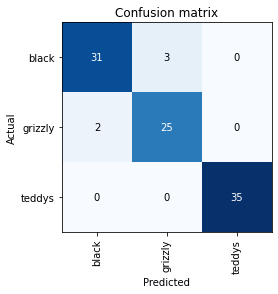

In [0]:
interp.plot_confusion_matrix()                    #plot그래프 confusion_matrix() -->매트릭스 형태로 보여주기

## Cleaning Up

모델이 문제가 아니라 데이터 클래스 중에 관련이 없는 이미지가 존재해서 그렇다.
그래서 관련없는 것은 삭제

ImageCleanerfastai.widgets ---> 관련 없는거 삭제 가능

In [0]:
from fastai.widgets import *              #라이브러리 불러오기

In [0]:
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]   #top_loss_paths 가장 자신감 없는 애를 가지고 옴

In [0]:
# fd = FileDeleter(file_paths=top_loss_paths)  #colab에서는 이코드가 실행되지 않는다 -->오답률이 제일 높은 것들만 가지고 와서 사람이 직접 체크해서 정답을 알려주는 코드

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path)             #분활하지 않고 전체 데이터 세트를 만듭니다. 
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate) # resnet34 == CNN의 기본모델  생성

learn_cln.load('stage-2');          # stage-2 학습한 데이터 불러오기

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)   # 제일 틀릴 확률 높은 이미지 가지고 오기

In [0]:
ImageCleaner(ds, idxs, path)   # ----> 이미지 클리너 (불량 이미지 삭제)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
# data_cleaned = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv',    # cleaned.csv'를 사용하여 새 데이터 번치를 작성하고이를 사용하여 모델을 학습
#                                       label_col=1,
#                                       valid_pct=0.2,
#                                       ds_tfms=get_transforms(), size=224, 
#                                       num_workers=0).normalize(imagenet_stats)

In [0]:
learn.export()      #export로 학습한거 내보내기   작업중인 디렉토리에 'export.pkl'이라는 파일이 생성됩니다. 파일에는 모델을 배포하는 데 필요한 모든 것이 포함되어 있습니다 

In [0]:
defaults.device = torch.device('cpu')       # GPU가없는 경우 cpu로 사용

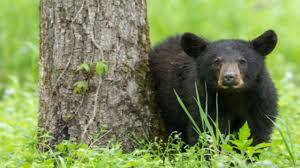

In [0]:
img = open_image(path/'black'/'00000021.jpg') # 테스트할 이미지를 불러온다
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)        # 학습한거 불러오기

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)    # 이 카테고리의 이미지를 예측해보기
pred_class                                            # 이 객체는 블랙곰이다

Category black

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)     #학습률이 너무 높으면 너무 벗어나 버린다

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,21.604572,53749460.000000,0.718750,00:06


### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)  

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)                     #학습률이 너무 낮으면 진행이 되지 않는다

epoch,train_loss,valid_loss,error_rate,time
0,1.847350,2.041105,0.760417,00:06
1,1.840966,1.716100,0.760417,00:06
2,1.820682,1.558536,0.750000,00:06
3,1.828149,1.467518,0.729167,00:06
4,1.814510,1.449297,0.729167,00:06


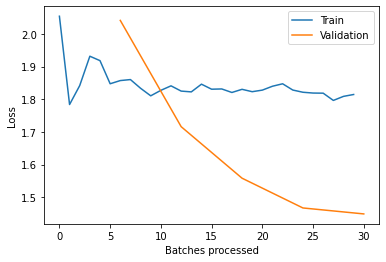

In [0]:
learn.recorder.plot_losses()                        

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)                        #적은 학습량은 학습되지 않는다.

epoch,train_loss,valid_loss,error_rate,time
0,1.478422,3.253664,0.552083,00:06


### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))        #여러번의 학습 정밀도가 오르거나 내리거나 반복   // 훈련손실이 검증손실보다 낮다면 올바른 학습이다.

epoch,train_loss,valid_loss,error_rate,time
0,1.721755,1.305945,0.488426,00:06
1,1.466705,1.186144,0.474537,00:04
2,1.422256,1.076216,0.465278,00:04
3,1.375548,0.974097,0.414352,00:04
4,1.291738,0.867940,0.361111,00:04
5,1.206289,0.753738,0.300926,00:04
6,1.105253,0.640449,0.236111,00:04
7,1.014408,0.545212,0.194444,00:04
8,0.911237,0.467521,0.162037,00:04
9,0.831396,0.399002,0.145833,00:04
